In [4]:
import numpy as np
import scipy.interpolate as spip

from time import process_time

from main import compute_BH_evolution, load_CDF_data

In [5]:
CDF_data = load_CDF_data("CDF_data.h5")
CDF_vals = CDF_data[:, 0]
x_vals = CDF_data[:, 1]

inv_CDF_interp = spip.CubicSpline(CDF_vals, x_vals)

init_J = 0.
eps = 1.0

In [8]:
for init_M in np.arange(10., 101., 1.):
    N = 50000
    print(init_M, N)
    for _ in range(100):
        rands = np.random.uniform(
            size=N,
            low=CDF_vals[0],
            high=CDF_vals[-1],
        )
        changes_array = inv_CDF_interp(rands)
        rands_array = np.random.rand(N)

        t1 = process_time()
        M, J, a, n, extremal, path = compute_BH_evolution(init_M, init_J, eps, changes_array, rands_array)
        t2 = process_time()

        with open("./seq_result3.csv", "a") as f:
            f.write(f"{init_M},{init_J},{M},{J},{a},{n},{t2-t1:.3e}\n")

10.0 50000
11.0 50000
12.0 50000
13.0 50000
14.0 50000
15.0 50000
16.0 50000
17.0 50000
18.0 50000
19.0 50000
20.0 50000
21.0 50000
22.0 50000
23.0 50000
24.0 50000
25.0 50000
26.0 50000
27.0 50000
28.0 50000
29.0 50000
30.0 50000
31.0 50000
32.0 50000
33.0 50000
34.0 50000
35.0 50000
36.0 50000
37.0 50000
38.0 50000
39.0 50000
40.0 50000
41.0 50000
42.0 50000
43.0 50000
44.0 50000
45.0 50000
46.0 50000
47.0 50000
48.0 50000
49.0 50000
50.0 50000
51.0 50000
52.0 50000
53.0 50000
54.0 50000
55.0 50000
56.0 50000
57.0 50000
58.0 50000
59.0 50000
60.0 50000
61.0 50000
62.0 50000
63.0 50000
64.0 50000
65.0 50000
66.0 50000
67.0 50000
68.0 50000
69.0 50000
70.0 50000
71.0 50000
72.0 50000
73.0 50000
74.0 50000
75.0 50000
76.0 50000
77.0 50000
78.0 50000
79.0 50000
80.0 50000
81.0 50000
82.0 50000
83.0 50000
84.0 50000
85.0 50000
86.0 50000
87.0 50000
88.0 50000
89.0 50000
90.0 50000
91.0 50000
92.0 50000
93.0 50000
94.0 50000
95.0 50000
96.0 50000
97.0 50000
98.0 50000
99.0 50000
100.0 5000

In [12]:
data = np.genfromtxt("seq_result3.csv", delimiter=",")
M_vals = np.unique(data[:, 0])

n_iters_min = []
n_iters_median = []
n_iters_max = []

for M in M_vals:
    M_arr = data[np.where((data[:, 0] == M))]

    n_iters_min.append(np.min(M_arr[:, -2]))
    n_iters_median.append(np.median(M_arr[:, -2]))
    n_iters_max.append(np.max(M_arr[:, -2]))

    print(M, np.min(M_arr[:, -2]),np.median(M_arr[:, -2]), np.max(M_arr[:, -2]))


10.0 436.0 464.0 502.0
11.0 524.0 562.0 603.0
12.0 635.0 669.0 716.0
13.0 738.0 790.5 836.0
14.0 870.0 911.5 976.0
15.0 995.0 1049.0 1092.0
16.0 1130.0 1186.0 1244.0
17.0 1296.0 1342.0 1412.0
18.0 1434.0 1509.0 1574.0
19.0 1629.0 1683.5 1744.0
20.0 1802.0 1858.0 1924.0
21.0 1980.0 2052.5 2121.0
22.0 2178.0 2255.0 2334.0
23.0 2383.0 2459.0 2550.0
24.0 2542.0 2678.0 2784.0
25.0 2808.0 2914.0 3000.0
26.0 3072.0 3156.0 3277.0
27.0 3296.0 3395.0 3500.0
28.0 3556.0 3649.0 3736.0
29.0 3826.0 3918.0 4038.0
30.0 4095.0 4186.0 4296.0
31.0 4360.0 4471.5 4588.0
32.0 4610.0 4762.0 4848.0
33.0 4968.0 5076.0 5177.0
34.0 5262.0 5370.0 5514.0
35.0 5582.0 5701.0 5831.0
36.0 5896.0 6024.0 6132.0
37.0 6234.0 6361.5 6504.0
38.0 6569.0 6732.0 6846.0
39.0 6916.0 7078.0 7247.0
40.0 7308.0 7452.0 7570.0
41.0 7691.0 7826.0 7972.0
42.0 8074.0 8205.0 8333.0
43.0 8466.0 8603.0 8715.0
44.0 8846.0 9015.0 9134.0
45.0 9252.0 9415.0 9580.0
46.0 9712.0 9848.0 10088.0
47.0 10124.0 10275.0 10498.0
48.0 10594.0 10722.0 109

In [14]:
from sklearn.linear_model import LinearRegression

model_min = LinearRegression().fit(np.log10(M_vals).reshape((-1, 1)), np.log10(n_iters_min))
model_median = LinearRegression().fit(np.log10(M_vals).reshape((-1, 1)), np.log10(n_iters_median))
model_max = LinearRegression().fit(np.log10(M_vals).reshape((-1, 1)), np.log10(n_iters_max))


In [16]:
M_predict = np.linspace(1e2, 1e7, 10000)
N_predict = 10**model_max.predict(np.log10(M_predict).reshape((-1, 1)))


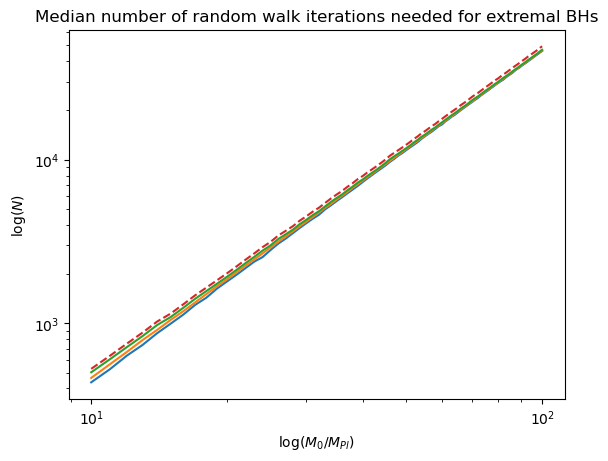

In [26]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(M_vals, n_iters_min)
plt.plot(M_vals, n_iters_median)
plt.plot(M_vals, n_iters_max)

N_safe = 1.05 * np.array(n_iters_max)
plt.plot(M_vals, N_safe, ls="--")

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"$\log(M_{0} / M_{Pl})$")
plt.ylabel(r"$\log(N)$")

plt.title("Median number of random walk iterations needed for extremal BHs")

plt.show()

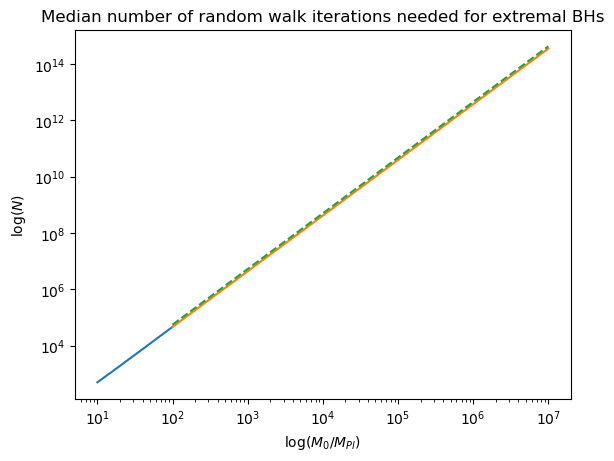

In [23]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(M_vals, n_iters_max)
plt.plot(M_predict, N_predict)

N_safe_test = 1.05 * N_predict

plt.plot(M_predict, N_safe_test, ls="--")

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"$\log(M_{0} / M_{Pl})$")
plt.ylabel(r"$\log(N)$")

plt.title("Median number of random walk iterations needed for extremal BHs")

plt.show()

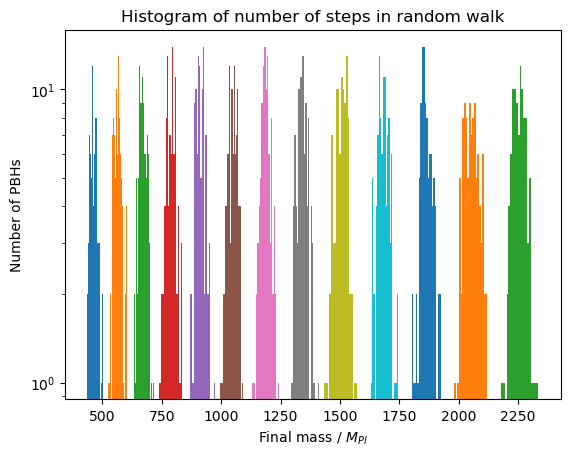

In [19]:
M_vals = np.unique(data[:, 0])

plt.figure()

for M in M_vals:
    M_arr = data[np.where((data[:, 0] == M))]

    step_vals = M_arr[:, 5]

    plt.hist(step_vals, bins = 20)

    if M > 21: break

plt.xlabel(r"Final mass / $M_{Pl}$")
plt.ylabel(r"Number of PBHs")

plt.yscale('log')

plt.title(r"Histogram of number of steps in random walk")

plt.show()

In [27]:
model_max.coef_[0]

1.9757566056099052